# Introduction

Anda seorang konsultan data dari salah satu firma konsultan diminta oleh tim bisnis divisi Payment dari sebuah lembaga pinjaman online untuk memprediksi user mana yang tidak akan menggunakan platform mereka lagi untuk melakukan pembayaran online. Mereka sebelumnya pernah meminta konsultan lain untuk membuat modelnya namun konsultan tersebut tidak bisa menjawab mengapa customer diprediksi churn atau tidak berdasarkan model yang dibuat sehingga model tersebut tidak bisa dipakai karena tidak transparan dan tidak bisa memperoleh insight apapun dari model tersebut.


## Metadata

Anda diberikan data dengan beberapa variabel yang diberikan sebagai berikut:
* user_id: customer account number.
* attrition_flag: customer status (Existing and Attrited).
* customer_age: age of the customer.
* gender: gender of customer (M for male and F for female).
* dependent_count: number of dependents of customers.
* education_level: customer education level (Uneducated, High School, Graduate, College, Post-Graduate, Doctorate, and Unknown).
* marital_status: customer's marital status (Single, Married, Divorced, and Unknown).
* income_category: customer income interval category (Less than \$40K, \$40K-\$60K, \$60K-\$80K, \$80K-\$120K, \$120K +, and Unknown).
* card_category: type of card used (Blue, Silver, Gold, and Platinum).
* months_on_book: period of being a customer (in months).
* total_relationship_count: the number of products used by customers in the bank.
* months_inactive_12_mon: period of inactivity for the last 12 months.
* contacts_count_12_mon: the number of interactions between the bank and the customer in the last 12 months.
* credit_limit: credit card transaction nominal limit in one period.
* total_revolving_bal: total funds used in one period.
* avg_open_to_buy: the difference between the credit limit set for the cardholder's account and the current balance.
* total_amt_chng_q4_q1: increase in customer transaction nominal between quarter 4 and quarter 1.
* total_trans_amt: total nominal transaction in the last 12 months.
* total_trans_ct: the number of transactions in the last 12 months.
* total_ct_chng_q4_q1: the number of customer transactions increased between quarter 4 and quarter 1.
* avg_utilization_ratio: percentage of credit card usage.

# Install & Load Library

In [ ]:
!pip install dalex
!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

import dalex as dx

import scikitplot as skplt 

%matplotlib inline

# Load Dataset

In [ ]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/bank_churn_dataset/bank_churn_data.csv")

# Data Inspection

In [ ]:
raw_data

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

Check missing values

In [ ]:
raw_data.isna().sum()

user_id                     0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
total_ct_chng_q4_q1         0
avg_utilization_ratio       0
dtype: int64

Typecasting categorical variables into numeric

In [ ]:
raw_data['attrition_flag'].replace(['Existing Customer','Attrited Customer'],[0,1],inplace=True)
raw_data['gender'].replace(['M','F'],[0,1],inplace=True)
raw_data['education_level'].replace(['Unknown','Uneducated','High School','College','Graduate','Post-Graduate','Doctorate'],[0,1,2,3,4,5,6],inplace=True)
raw_data['marital_status'].replace(['Unknown','Single','Married','Divorced'],[0,1,2,3],inplace=True)
raw_data['income_category'].replace(['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +'],[0,1,2,3,4,5],inplace=True)
raw_data['card_category'].replace(['Blue','Silver','Gold', 'Platinum'],[0,1,2,3],inplace=True)

Check new data structure

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  int64  
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  int64  
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  int64  
 6   marital_status            10127 non-null  int64  
 7   income_category           10127 non-null  int64  
 8   card_category             10127 non-null  int64  
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

Change column names

In [ ]:
raw_data.rename(columns = {'marital_status':'marital status', 'income_category':'income category',
                           'card_category':'card category', 'total_relationship_count':'total product used',
                           'months_inactive_12_mon':'months inactive', 'contacts_count_12_mon': 'total interaction',
                           'total_revolving_bal':'funds used in period', 'total_trans_ct':'total trans freq',
                           'total_ct_chng_q4_q1':'increase trans q4-q1', 'avg_utilization_ratio':'avg cc usage'},
                inplace = True)

# check again the structure
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               10127 non-null  int64  
 1   attrition_flag        10127 non-null  int64  
 2   customer_age          10127 non-null  int64  
 3   gender                10127 non-null  int64  
 4   dependent_count       10127 non-null  int64  
 5   education_level       10127 non-null  int64  
 6   marital status        10127 non-null  int64  
 7   income category       10127 non-null  int64  
 8   card category         10127 non-null  int64  
 9   months_on_book        10127 non-null  int64  
 10  total product used    10127 non-null  int64  
 11  months inactive       10127 non-null  int64  
 12  total interaction     10127 non-null  int64  
 13  credit_limit          10127 non-null  float64
 14  funds used in period  10127 non-null  int64  
 15  avg_open_to_buy    

We need to remove user_id from dataset

In [ ]:
raw_data = raw_data.drop(["user_id"], axis = 1)

In [ ]:
raw_data

,attrition_flag,customer_age,gender,dependent_count,education_level,marital status,income category,card category,months_on_book,total product used,months inactive,total interaction,credit_limit,funds used in period,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total trans freq,increase trans q4-q1,avg cc usage
0,0,45,0,3,2,2,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,4,1,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,4,2,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,2,0,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,1,2,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,4,1,2,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,0,2,0,3,2,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,1,1,2,2,1,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,0,2,4,0,2,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


# Train-Test Split Data

Split data before data exploration and engineering

In [ ]:
X = raw_data.drop(["attrition_flag"], axis = 1)
y = raw_data["attrition_flag"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.2,
    stratify = y, 
    random_state=1000
)

# Data Exploration

In [ ]:
X_train["attrition_flag"] = y_train

Let's check target distribution

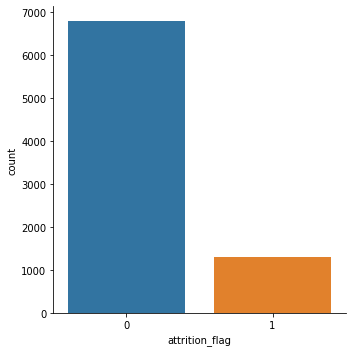

In [ ]:
sns.catplot(x = "attrition_flag", kind = "count", data = X_train);

We can observe there imbalance case in our dataset. We can solve this in two ways:

- Post-modeling, by changing classification threshold to optimize metrics such as F1-Score, precision, recall, etc
- Pre-modeling, by doing resamping such as oversampling, downsampling, and mixed sampling

We gonna do post-modeling (threshold) if necessary

Next we gonna check multicolinearity for each variable


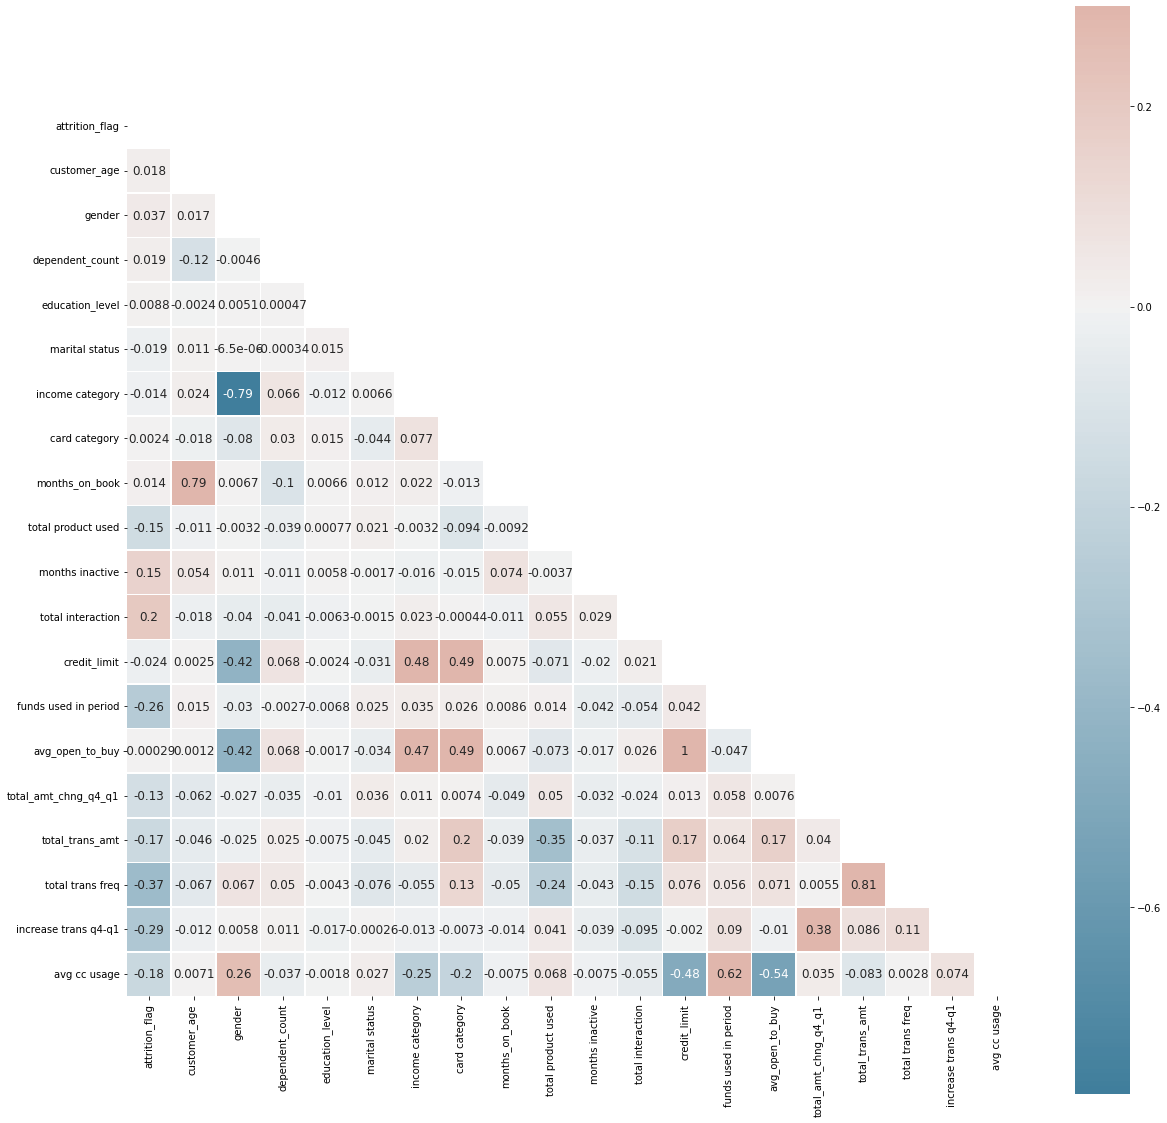

In [ ]:
corr = raw_data.corr()
masking = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr, 
    mask=masking, 
    cmap=cmap, 
    vmax=.3, 
    center=0,
    square=True, 
    linewidths=.5,
    annot=True,
    annot_kws={'size':12}
);

We observe multiple multicolinearity between avg_open_to_buy vs credit_limit, total_trans_ct vs total_trans_amt, months_on_book vs customer_age, total_revolving_bal vs avg_utilization_ratio. After this, we will analyse those variables more deep in the boxplots.


## Categorical Data vs attrition_flag

**gender vs attrition_flag**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



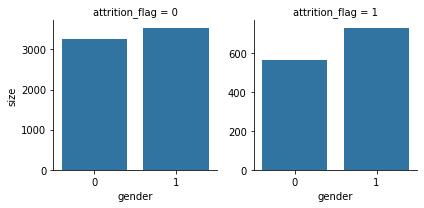

In [ ]:
g = sns.FacetGrid(
    data = X_train.groupby(["gender","attrition_flag"], as_index = False).size(),
    col = "attrition_flag",
    sharex = False,
    sharey = False
)
g.map(sns.barplot, "gender", "size");

We can observe that female has higher churn rate, we can:
- remove this because gender is one of protected features that need to be removed from dataset
- remove this feature because is has no benefit to improve model accuracy


**education_level vs attrition_flag**


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



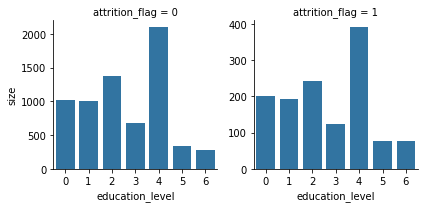

In [ ]:
g = sns.FacetGrid(
    data = X_train.groupby(["education_level","attrition_flag"], as_index = False).size(),
    col = "attrition_flag",
    sharex = False,
    sharey = False
)
g.map(sns.barplot, "education_level", "size");

It seems that user with graduate education level will more likely to churn. The doctoral, post-graduate, and college customer is lowest three. But we can see the same distribution at the not churn value. We will remove this variable.


**marital_status vs attrition_flag**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



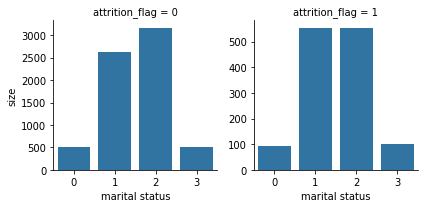

In [ ]:
g = sns.FacetGrid(
    data = X_train.groupby(["marital status","attrition_flag"], as_index = False).size(),
    col = "attrition_flag",
    sharex = False,
    sharey = False
)
g.map(sns.barplot, "marital status", "size");

The user with the marital status of single and married are more likely to churn, while user who divorced is less likely to churn.


**income_category vs attrition_flag**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



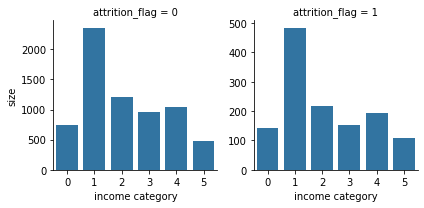

In [ ]:
g = sns.FacetGrid(
    data = X_train.groupby(["income category","attrition_flag"], as_index = False).size(),
    col = "attrition_flag",
    sharex = False,
    sharey = False
)
g.map(sns.barplot, "income category", "size");

We can observe that people with lower income (less than $400K) is more likely to churn


**card_category vs attrition_flag**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



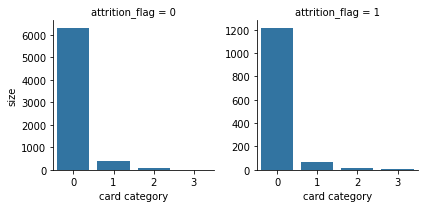

In [ ]:
g = sns.FacetGrid(
    data = X_train.groupby(["card category","attrition_flag"], as_index = False).size(),
    col = "attrition_flag",
    sharex = False,
    sharey = False
)
g.map(sns.barplot, "card category", "size");

We can observe that the blue card user will more likely to churn.

## Numerical Data vs attrition_flag

**Age vs attrition_flag**

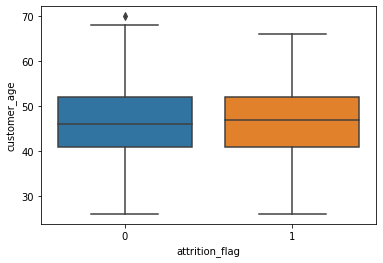

In [ ]:
sns.boxplot(x = "attrition_flag", y = "customer_age", data = X_train);

We can observe that the distribustion of age both in the churn and not churn is relatively the same. We can drop this variable.

**Dependent count vs attrition_flag**

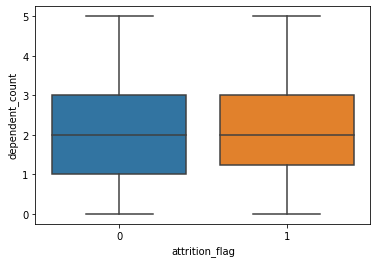

In [ ]:
sns.boxplot(x = "attrition_flag", y = "dependent_count", data = X_train);

We can observe that the distribustion of dependent count both in the churn and not churn is relatively the same. We can drop this variable.

**Months on Book vs attrition_flag**

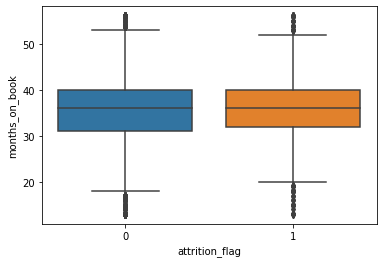

In [ ]:
sns.boxplot(x = "attrition_flag", y = "months_on_book", data = X_train);

We can observe that period of being a customer have relatively the same distribution between user who churn and not churn. We can remove this variable.

**Total Relationship Count vs attrition_flag**

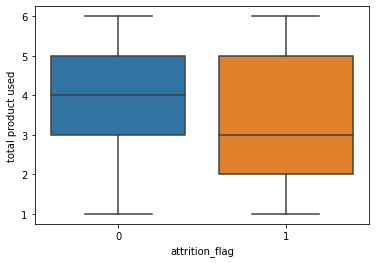

In [ ]:
sns.boxplot(x = "attrition_flag", y = "total product used", data = X_train);

We can observe the one with lower relationship count is more likely to churn.

**Months inactive vs attrition_flag**

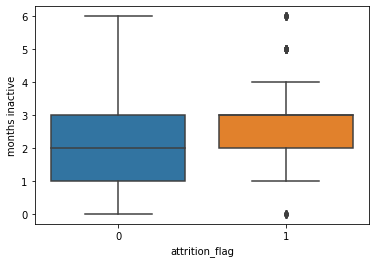

In [ ]:
sns.boxplot(x = "attrition_flag", y = "months inactive", data = X_train);

We can observe the one with 2-3 months inactivity is more likely to churn. But, it's not too different with user who are not churn, the variance is just bigger.

**Number of Interaction within 12 months vs attrition_flag**

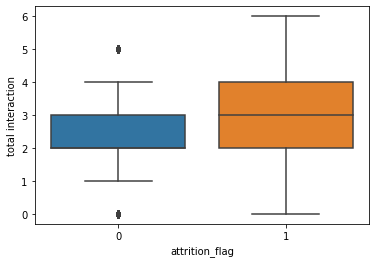

In [ ]:
sns.boxplot(x = "attrition_flag", y = "total interaction", data = X_train);

We can observe that the user with more number of interaction is actually more likely to churn

**Credit Limit vs attrition_flag**

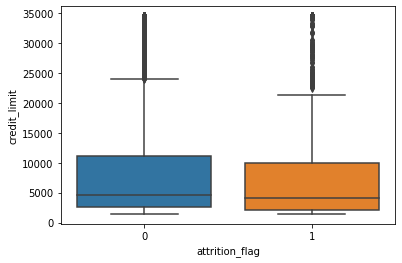

In [ ]:
sns.boxplot(x = "attrition_flag", y = "credit_limit", data = X_train);

The distribution of credit limit for churning user and not are relatively the same. We can drop this variable.

**Total Funds Used in One Period vs attrition_flag**

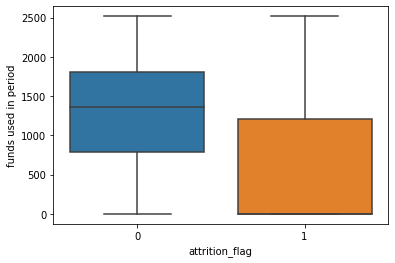

In [ ]:
sns.boxplot(x = "attrition_flag", y = "funds used in period", data = X_train);

We can observe that the higher the total funds used in a period, the user will less likely to churn

**The difference between the credit limit and the current balance vs attrition_flag**

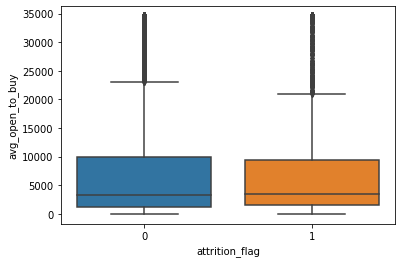

In [ ]:
sns.boxplot(x = "attrition_flag", y = "avg_open_to_buy", data = X_train);

The distribution is pretty similar, we can remove this variable.

**Increase in customer transaction nominal between quarter 4 and quarter 1 vs attrition_flag**

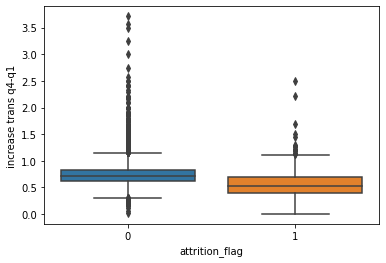

In [ ]:
sns.boxplot(x = "attrition_flag", y = "increase trans q4-q1", data = X_train);

The increase of transaction doesn't look significantly different between user who churn and not churn. We can drop this variable

**total nominal transaction vs attrition_flag**

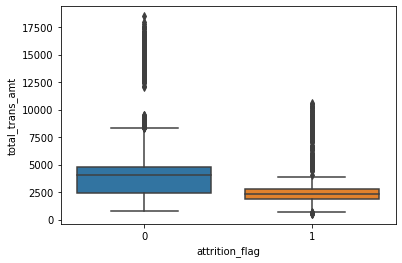

In [ ]:
sns.boxplot(x = "attrition_flag", y = "total_trans_amt", data = X_train);

The higher the total nominal transaction, the user will less likely to churn

**the number of transactions vs attrition_flag**

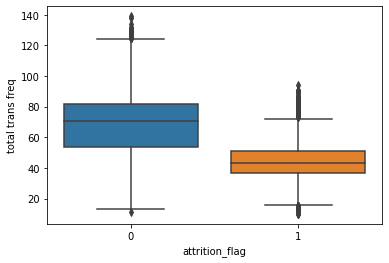

In [ ]:
sns.boxplot(x = "attrition_flag", y = "total trans freq", data = X_train);

The higher number the transaction, the less likely the user will churn

**increased number of customer transactions between quarter 4 and quarter 1 vs attrition_flag**

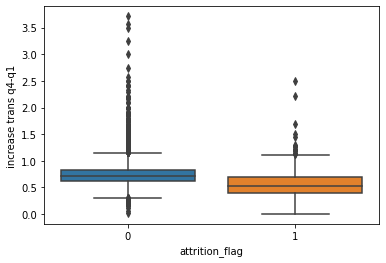

In [ ]:
sns.boxplot(x = "attrition_flag", y = "increase trans q4-q1", data = X_train);

The difference increased number of transaction between user who churn and not is slightly different. Let's try to keep this variable.

**Percentage of credit card usage vs attrition_flag**

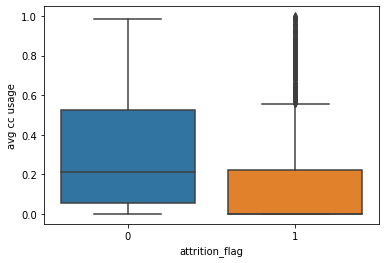

In [ ]:
sns.boxplot(x = "attrition_flag", y = "avg cc usage", data = X_train);

The higher the percentage usage, the less like user will churn.

## Drop Columns

After observations, we'll drop some columns/variables that is not significant with the churn/attrition variable. Other than that, we need to drop the attrition flag too before modeling.

In [ ]:
X_train = X_train.drop(["gender","education_level","customer_age","dependent_count","months_on_book","credit_limit","avg_open_to_buy","increase trans q4-q1","total_trans_amt"], axis = 1)
X_test = X_test.drop(["gender","education_level","customer_age","dependent_count","months_on_book","credit_limit","avg_open_to_buy","increase trans q4-q1","total_trans_amt"], axis = 1)

In [ ]:
X_train = X_train.drop(["attrition_flag"], axis = 1)

# Modeling

## Define Model

We will use 5 models:

- KNN as a baseline model
- Decision tree
- Random Forest
- SVM RBF
- XGBoost


**KNN**

In [ ]:
knn_clf = KNeighborsClassifier(
    n_neighbors = 5
)

**Decision Tree**

In [ ]:
dc_clf = DecisionTreeClassifier(
    max_depth = 5,
    ccp_alpha = 0.001
)

**Random Forest**

In [ ]:
rf_clf = RandomForestClassifier(
    random_state=1000,
    n_estimators=1000
)

**SVM RBF**

In [ ]:
svm_clf = SVC(
    random_state = 1000,
    probability=True
)

**XGBoost**

In [ ]:
xgb_clf = XGBClassifier(
    random_state=1000,
    n_estimators=1000
)

## Fitting Model to Data

**KNN**

In [ ]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

**Decision Tree**

In [ ]:
dc_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5)

**Random Forest**

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=1000)

**SVM RBF**

In [ ]:
svm_clf.fit(X_train, y_train)

SVC(probability=True, random_state=1000)

**XGBoost**

In [ ]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(n_estimators=1000, random_state=1000)

## Model Evaluation

In [ ]:
# knn prediction
knn_pred = knn_clf.predict(X_test)
knn_pred_proba = knn_clf.predict_proba(X_test)

# decision tree prediction
dc_pred = dc_clf.predict(X_test)
dc_pred_proba = dc_clf.predict_proba(X_test)

# random forest prediction
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

# SVM RBF prediction
svm_pred = svm_clf.predict(X_test)
svm_pred_proba = svm_clf.predict_proba(X_test)

# XGBoost prediction
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)

### **KNN Evaluation**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, knn_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.906770,0.700893,0.884008,0.803832,0.873745
recall,0.960611,0.483077,0.884008,0.721844,0.884008
f1-score,0.932915,0.571949,0.884008,0.752432,0.875010
support,1701.000000,325.000000,0.884008,2026.000000,2026.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



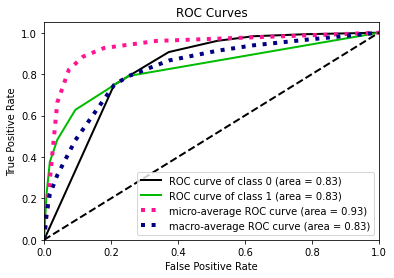

In [ ]:
skplt.metrics.plot_roc_curve(y_test, knn_pred_proba);

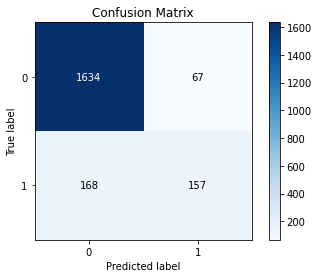

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, knn_pred);

###**Decision Tree**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, dc_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.923510,0.762097,0.903751,0.842803,0.897617
recall,0.965315,0.581538,0.903751,0.773426,0.903751
f1-score,0.943949,0.659686,0.903751,0.801818,0.898349
support,1701.000000,325.000000,0.903751,2026.000000,2026.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



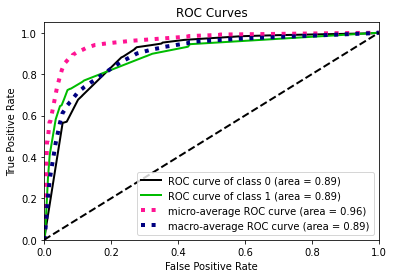

In [ ]:
skplt.metrics.plot_roc_curve(y_test, dc_pred_proba);

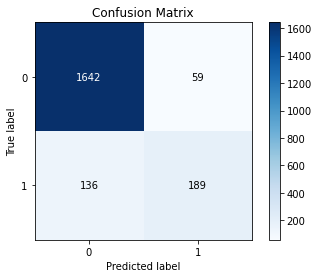

In [ ]:
# multi-layered perceptron result
skplt.metrics.plot_confusion_matrix(y_test, dc_pred);

###**Random Forest**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.934807,0.801527,0.917572,0.868167,0.913427
recall,0.969430,0.646154,0.917572,0.807792,0.917572
f1-score,0.951804,0.715503,0.917572,0.833653,0.913898
support,1701.000000,325.000000,0.917572,2026.000000,2026.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



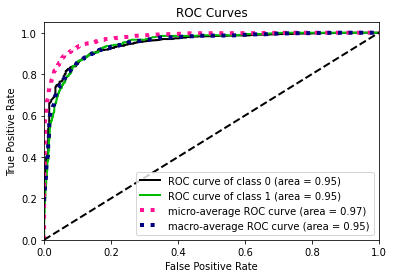

In [ ]:
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);

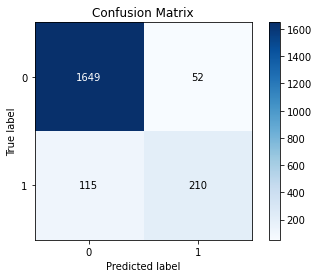

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, rf_pred);

###**SVM RBF**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, svm_pred, target_names=['Not Churn','Churn'], output_dict=True))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.839585,0.0,0.839585,0.419793,0.704904
recall,1.000000,0.0,0.839585,0.500000,0.839585
f1-score,0.912798,0.0,0.839585,0.456399,0.766372
support,1701.000000,325.0,0.839585,2026.000000,2026.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



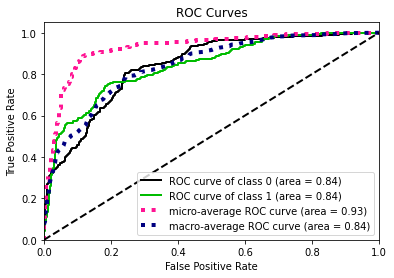

In [ ]:
skplt.metrics.plot_roc_curve(y_test, svm_pred_proba);

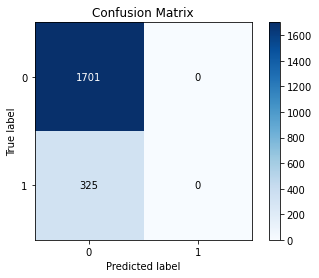

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, svm_pred);

###**XGBoost**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['Not Churn','Churn'], output_dict=True))

,Not Churn,Churn,accuracy,macro avg,weighted avg
precision,0.943103,0.790210,0.92152,0.866657,0.918577
recall,0.964727,0.695385,0.92152,0.830056,0.921520
f1-score,0.953793,0.739771,0.92152,0.846782,0.919460
support,1701.000000,325.000000,0.92152,2026.000000,2026.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.



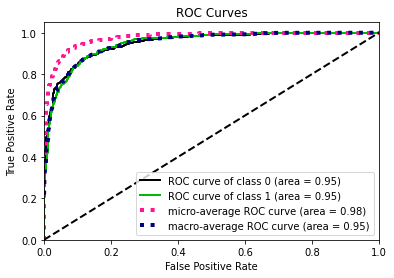

In [ ]:
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba);

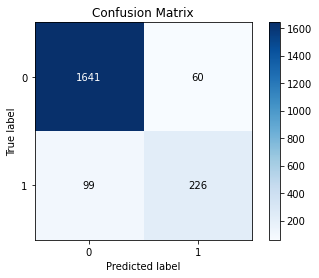

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred);

After modelling, we found that **XGBoost** is the best model trained, shown by the f1-score for predict churn and not churn, accuracy, and the confusion matrix.

## Handle Imbalance Class Dataset with G-Means

### G-Means: KNN

In [ ]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_pred_proba[:,1])

# calculate g-means
knn_gmeans = np.sqrt(tpr * (1-fpr))

In [ ]:
# find the best threshold
knn_ix = np.argmax(knn_gmeans)
print('Best Threshold={}, G-Mean={}'.format(thresholds[knn_ix], knn_gmeans[knn_ix]))

Best Threshold=0.2, G-Mean=0.7692844009703221


In [ ]:
# change predict proba result to optimized one using new threshold
new_knn_pred = (knn_pred_proba[:,1] >= thresholds[knn_ix]).astype(int)

# compare the old f-1 score and new f1-score
display("old f1-score = ",metrics.f1_score(y_test, knn_pred))
display("new f1-score = ", metrics.f1_score(y_test, new_knn_pred))

'old f1-score = '

0.5719489981785064

'new f1-score = '

0.5089108910891089

### G-Means: Decision Tree

In [ ]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, dc_pred_proba[:,1])

# calculate g-means
dc_gmeans = np.sqrt(tpr * (1-fpr))

In [ ]:
# find the best threshold
dc_ix = np.argmax(dc_gmeans)
print('Best Threshold={}, G-Mean={}'.format(thresholds[dc_ix], dc_gmeans[dc_ix]))

Best Threshold=0.0967741935483871, G-Mean=0.8230610951311301


In [ ]:
# change predict proba result to optimized one using new threshold
new_dc_pred = (dc_pred_proba[:,1] >= thresholds[dc_ix]).astype(int)

# compare the old f-1 score and new f1-score
display("old f1-score = ",metrics.f1_score(y_test, dc_pred))
display("new f1-score = ", metrics.f1_score(y_test, new_dc_pred))

'old f1-score = '

0.6596858638743456

'new f1-score = '

0.6426735218508998

### G-Means: Random Forest

In [ ]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_pred_proba[:,1])

# calculate g-means
rf_gmeans = np.sqrt(tpr * (1-fpr))

In [ ]:
# find the best threshold
rf_ix = np.argmax(rf_gmeans)
print('Best Threshold={}, G-Mean={}'.format(thresholds[rf_ix], rf_gmeans[rf_ix]))

Best Threshold=0.201, G-Mean=0.8807174260522347


In [ ]:
# change predict proba result to optimized one using new threshold
new_rf_pred = (rf_pred_proba[:,1] >= thresholds[rf_ix]).astype(int)

# compare the old f-1 score and new f1-score
display("old f1-score = ",metrics.f1_score(y_test, rf_pred))
display("new f1-score = ", metrics.f1_score(y_test, new_rf_pred))

'old f1-score = '

0.7155025553662692

'new f1-score = '

0.7195902688860435

### G-Means: SVM

In [ ]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_pred_proba[:,1])

# calculate g-means
svm_gmeans = np.sqrt(tpr * (1-fpr))

In [ ]:
# find the best threshold
svm_ix = np.argmax(svm_gmeans)
print('Best Threshold={}, G-Mean={}'.format(thresholds[svm_ix], svm_gmeans[svm_ix]))

Best Threshold=0.10492411814483765, G-Mean=0.7799342162200059


In [ ]:
# change predict proba result to optimized one using new threshold
new_svm_pred = (svm_pred_proba[:,1] >= thresholds[svm_ix]).astype(int)

# compare the old f-1 score and new f1-score
display("old f1-score = ",metrics.f1_score(y_test, svm_pred))
display("new f1-score = ", metrics.f1_score(y_test, new_svm_pred))

'old f1-score = '

0.0

'new f1-score = '

0.543646408839779

### G-Means: XGBoost

In [ ]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, xgb_pred_proba[:,1])
# calculate g-means
xgb_gmeans = np.sqrt(tpr * (1-fpr))

In [ ]:
# find the best threshold
xgb_ix = np.argmax(xgb_gmeans)
print('Best Threshold={}, G-Mean={}'.format(thresholds[xgb_ix], xgb_gmeans[xgb_ix]))

Best Threshold=0.10272442549467087, G-Mean=0.8786714357844416


In [ ]:
# change predict proba result to optimized one using new threshold
new_xgb_pred = (xgb_pred_proba[:,1] >= thresholds[xgb_ix]).astype(int)

# compare the old f-1 score and new f1-score
display("old f1-score = ",metrics.f1_score(y_test, xgb_pred))
display("new f1-score = ", metrics.f1_score(y_test, new_xgb_pred))

'old f1-score = '

0.739770867430442

'new f1-score = '

0.6923076923076923

In [ ]:
old_knn = metrics.f1_score(y_test, knn_pred)
new_knn = metrics.f1_score(y_test, new_knn_pred)
old_dc = metrics.f1_score(y_test, dc_pred)
new_dc = metrics.f1_score(y_test, new_dc_pred)
old_rf = metrics.f1_score(y_test, rf_pred)
new_rf = metrics.f1_score(y_test, new_rf_pred)
old_svm = metrics.f1_score(y_test, svm_pred)
new_svm = metrics.f1_score(y_test, new_svm_pred)
old_xgb = metrics.f1_score(y_test, xgb_pred)
new_xgb = metrics.f1_score(y_test, new_xgb_pred)

display("old KNN f1-score = ", old_knn)
display("new KNN f1-score = ", new_knn)
display("old DC f1-score = ", old_dc)
display("new DC f1-score = ", new_dc)
display("old RF f1-score = ", old_rf)
display("new RF f1-score = ", new_rf)
display("old SVM f1-score = ", old_svm)
display("new SVM f1-score = ", new_svm)
display("old XGB f1-score = ", old_xgb)
display("new SVM f1-score = ", new_xgb)

'old KNN f1-score = '

0.5719489981785064

'new KNN f1-score = '

0.5089108910891089

'old DC f1-score = '

0.6596858638743456

'new DC f1-score = '

0.6426735218508998

'old RF f1-score = '

0.7155025553662692

'new RF f1-score = '

0.7195902688860435

'old SVM f1-score = '

0.0

'new SVM f1-score = '

0.543646408839779

'old XGB f1-score = '

0.739770867430442

'new SVM f1-score = '

0.6923076923076923

# Explanatory Model Analysis

In [ ]:
## initiate explainer for Random Forest model
churn_rf_exp = dx.Explainer(rf_clf, X_train, y_train, label = "RF Interpretation")

## initiate explainer for XGBoost model
churn_xgb_exp = dx.Explainer(xgb_clf, X_train, y_train, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 8101 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8101 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF Interpretation
  -> predict function  : <function yhat_proba_default at 0x7fa600eb8200> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



  -> predicted values  : min = 0.0, mean = 0.161, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.365, mean = -0.000398, max = 0.401
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 8101 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 8101 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x7fa600eb8200> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 3.12e-09, mean = 0.161, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : dif

## Feature Importance

In [ ]:
# visualize permutation feature importance for Random Forest Model
churn_rf_exp.model_parts().plot()

In [ ]:
# visualize permutation feature importance for XGBoost model
churn_xgb_exp.model_parts().plot()

## Partial Dependence Plot

In [ ]:
# create partial dependence plot of Random Forest model
churn_rf_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 10/10 [00:22<00:00,  2.26s/it]


In [ ]:
# create partial dependence plot of XGBoost model
churn_xgb_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 10/10 [00:09<00:00,  1.02it/s]
